<a href="https://colab.research.google.com/github/UmutSonmezz/LANGRAPH/blob/main/Started_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key= userdata.get('groq_api_key')
langsmith = userdata.get('LANGSMITH_API_KEY')
print(langsmith)

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


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7cb8df803a00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7cb8df83c6d0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

#Chatbotla Langraph İnşa edelim


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages :Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages" : llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph=graph_builder.compile()

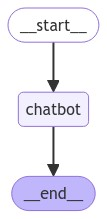

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User:  ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Asistant:", value ["messages"].content)

User:  hello
dict_values([{'messages': AIMessage(content='Hello! 👋  \n\nHow can I help you today? 😄\n', response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_time': 0.031279288, 'prompt_time': 0.002728307, 'queue_time': None, 'total_time': 0.034007595}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-8250f367-fb8d-42eb-b988-2f13d947b65c-0', usage_metadata={'input_tokens': 15, 'output_tokens': 16, 'total_tokens': 31})}])
content='Hello! 👋  \n\nHow can I help you today? 😄\n' response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_time': 0.031279288, 'prompt_time': 0.002728307, 'queue_time': None, 'total_time': 0.034007595}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-8250f367-fb8d-42eb-b988-2f13d947b65c-0' usage_metadata={'inpu